In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [69]:
train_data=pd.read_csv('/content/fraudTrain.csv')

In [70]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [72]:
train_data.dropna(inplace=True)

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [74]:
numeric_cols=train_data.select_dtypes(include=['number']).columns
numeric_cols

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

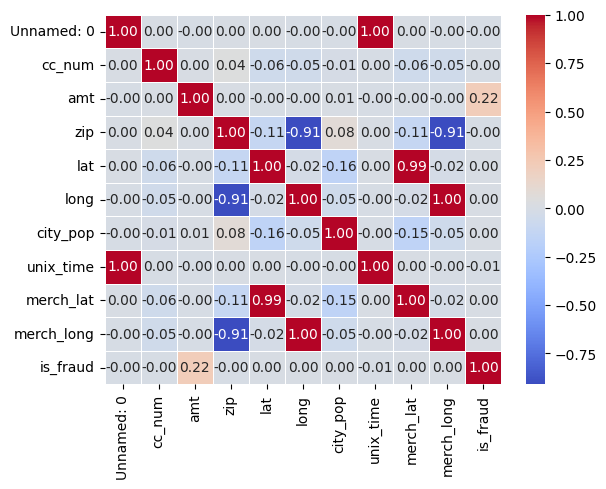

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=train_data[numeric_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5, fmt=".2f")
plt.show()

since amt is the only numeric column contributing anything,we only keep amt in our numeric column

In [76]:
numeric_col_not_required=numeric_cols.drop(['amt','is_fraud'])
train_data.drop(columns=numeric_col_not_required,inplace=True)

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   first                  1296675 non-null  object 
 5   last                   1296675 non-null  object 
 6   gender                 1296675 non-null  object 
 7   street                 1296675 non-null  object 
 8   city                   1296675 non-null  object 
 9   state                  1296675 non-null  object 
 10  job                    1296675 non-null  object 
 11  dob                    1296675 non-null  object 
 12  trans_num              1296675 non-null  object 
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(1), int

In [78]:
df=train_data.sample(frac=0.2,random_state=42)
df.drop(columns=['trans_num','trans_date_trans_time','street','first','last'],inplace=True)
df.head()

,merchant,category,amt,gender,city,state,job,dob,is_fraud
1045211,fraud_Towne LLC,misc_pos,194.51,M,Spring Church,PA,Public relations account executive,1997-10-23,0
547406,fraud_Friesen Ltd,health_fitness,52.32,F,Sixes,OR,Retail merchandiser,1928-10-01,0
110142,fraud_Mohr Inc,shopping_pos,6.53,F,Keisterville,PA,Systems developer,1945-11-04,0
1285953,fraud_Gaylord-Powlowski,home,7.33,M,Farmington,NY,Cytogeneticist,1952-10-13,0
271705,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,F,Lagrange,WY,Product/process development scientist,1973-07-13,0


In [79]:
df.value_counts('is_fraud')

,count
is_fraud,
0,257815
1,1520


<ipython-input-80-3006d83f1306>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['is_fraud']==1],x='gender',palette={'M': 'lightblue', 'F': 'orange'},ax=axes[0])
<ipython-input-80-3006d83f1306>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['is_fraud']==0],x='gender',palette={'M': 'lightblue', 'F': 'orange'},ax=axes[1])


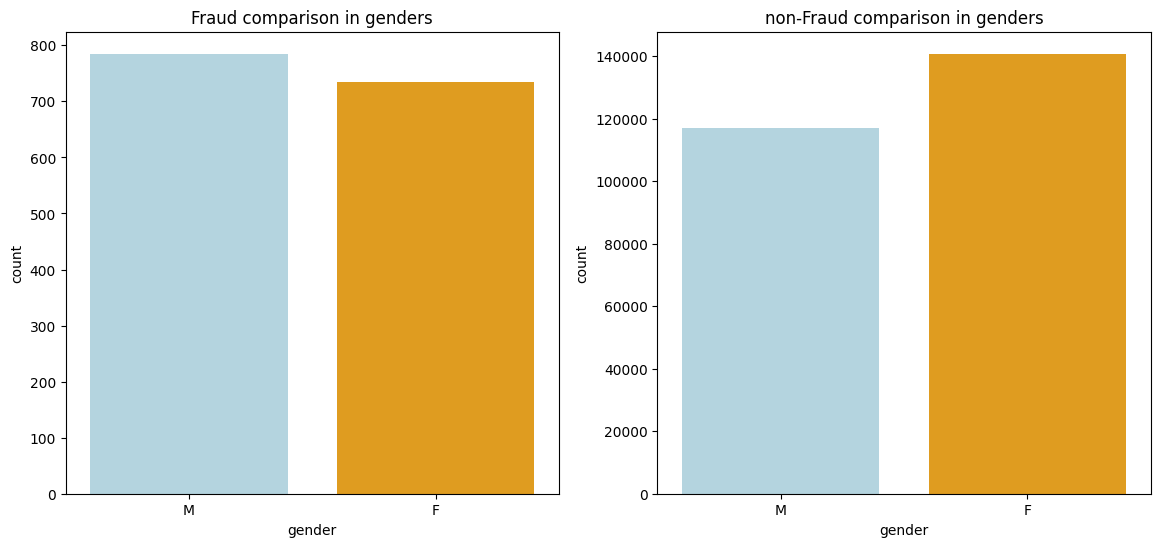

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df[df['is_fraud']==1],x='gender',palette={'M': 'lightblue', 'F': 'orange'},ax=axes[0])
axes[0].set_title('Fraud comparison in genders')
sns.countplot(data=df[df['is_fraud']==0],x='gender',palette={'M': 'lightblue', 'F': 'orange'},ax=axes[1])
axes[1].set_title('non-Fraud comparison in genders')
plt.show()

<ipython-input-81-cd75950032b7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig=sns.barplot(data=sorted_job_fraud_counts.head(10),y='job',x='fraud_count',palette='coolwarm')


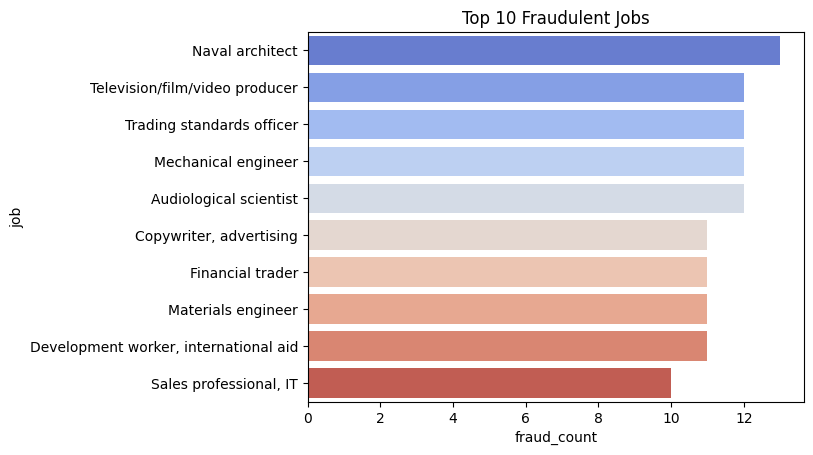

In [81]:
fraudulent_jobs = df[df['is_fraud'] == 1]
job_fraud_counts = fraudulent_jobs.groupby('job').size().reset_index(name='fraud_count')
sorted_job_fraud_counts = job_fraud_counts.sort_values(by='fraud_count', ascending=False)
fig=sns.barplot(data=sorted_job_fraud_counts.head(10),y='job',x='fraud_count',palette='coolwarm')
#plt.xticks(rotation=60,fontsize=8)
plt.title('Top 10 Fraudulent Jobs')
plt.show()

In [82]:
df.drop(columns=['job'],inplace=True)

<ipython-input-83-d531a52fe0f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_fraud_state.head(8),y='state',x='fraud_count',palette='coolwarm')


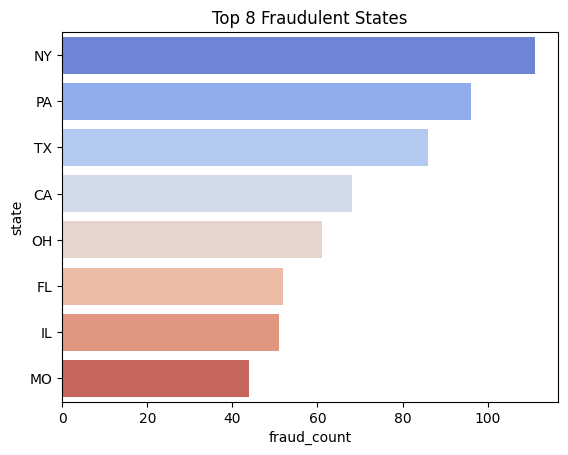

In [83]:
fraud_state=df[df['is_fraud']==1].groupby('state').size().reset_index(name='fraud_count')
sorted_fraud_state=fraud_state.sort_values(by='fraud_count',ascending=False)
sns.barplot(data=sorted_fraud_state.head(8),y='state',x='fraud_count',palette='coolwarm')
plt.title('Top 8 Fraudulent States')
plt.show()

In [84]:
df.drop(columns=['city'],inplace=True)
df.merchant.unique()

array(['fraud_Towne LLC', 'fraud_Friesen Ltd', 'fraud_Mohr Inc',
       'fraud_Gaylord-Powlowski',
       'fraud_Christiansen, Goyette and Schamberger',
       'fraud_Schuppe, Nolan and Hoeger', 'fraud_Kuhic Inc',
       'fraud_Douglas, Schneider and Turner', 'fraud_Hickle Group',
       'fraud_Bahringer-Streich', 'fraud_Pollich LLC',
       'fraud_Weber and Sons', 'fraud_Berge LLC',
       'fraud_Schmidt and Sons', 'fraud_Kozey-Boehm',
       'fraud_Gibson-Deckow', 'fraud_Trantow PLC', 'fraud_Cole PLC',
       'fraud_Kling, Howe and Schneider', 'fraud_Harris Group',
       'fraud_Pacocha-Weissnat', 'fraud_Schumm PLC',
       'fraud_Schaefer, McGlynn and Bosco', 'fraud_Emmerich-Rau',
       'fraud_Connelly, Reichert and Fritsch',
       'fraud_Johnson, Runolfsdottir and Mayer', 'fraud_Boyer PLC',
       'fraud_Tromp Group', 'fraud_Ernser-Feest', 'fraud_Hoppe-Parisian',
       'fraud_Runolfsdottir, Mueller and Hand',
       'fraud_Hettinger, McCullough and Fay', 'fraud_Labadie LLC',
   

<ipython-input-85-641f138699f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_fraud_merchant.head(8),y='merchant',x='fraud_count',palette='coolwarm')


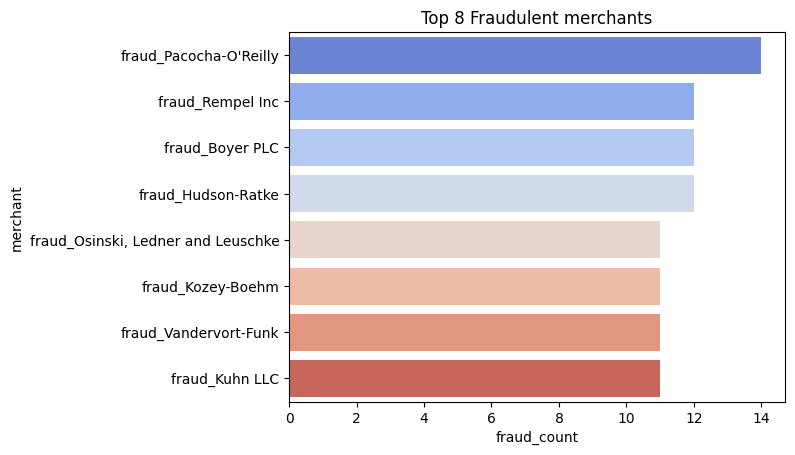

In [85]:
fraud_merchant=df[df['is_fraud']==1].groupby('merchant').size().reset_index(name='fraud_count')
sorted_fraud_merchant=fraud_merchant.sort_values(by='fraud_count',ascending=False)
sns.barplot(data=sorted_fraud_merchant.head(8),y='merchant',x='fraud_count',palette='coolwarm')
plt.title('Top 8 Fraudulent merchants')
plt.show()

In [86]:
df.drop(columns=['merchant'],inplace=True)

<ipython-input-87-40e701eb7f8e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_fraud_category,y='category',x='fraud_count',palette='coolwarm')


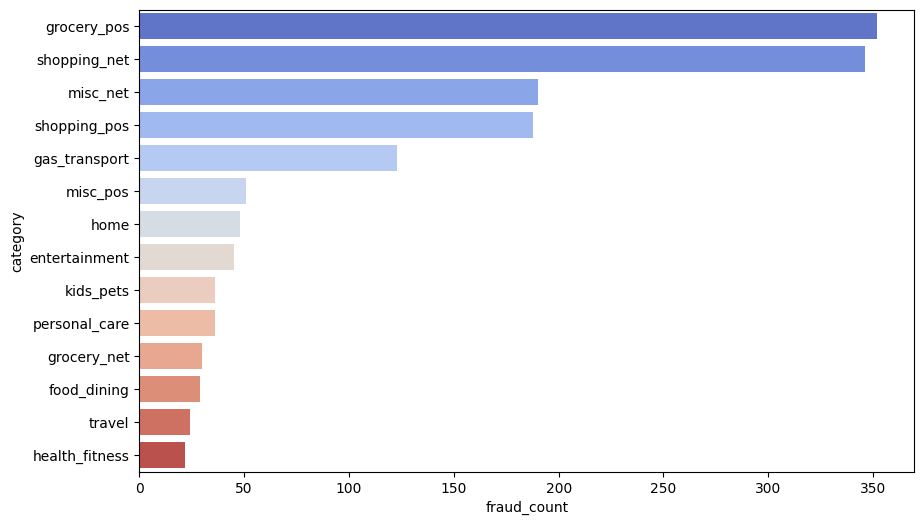

In [87]:
fraud_category=df[df['is_fraud']==1].groupby('category').size().reset_index(name='fraud_count')
sorted_fraud_category=fraud_category.sort_values(by='fraud_count',ascending=False)
plt.figure(figsize= (10, 6))
sns.barplot(data=sorted_fraud_category,y='category',x='fraud_count',palette='coolwarm')
plt.show()

<ipython-input-88-603cc192d634>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_fraud_dob.head(10),y='dob',x='fraud_count',palette='coolwarm')


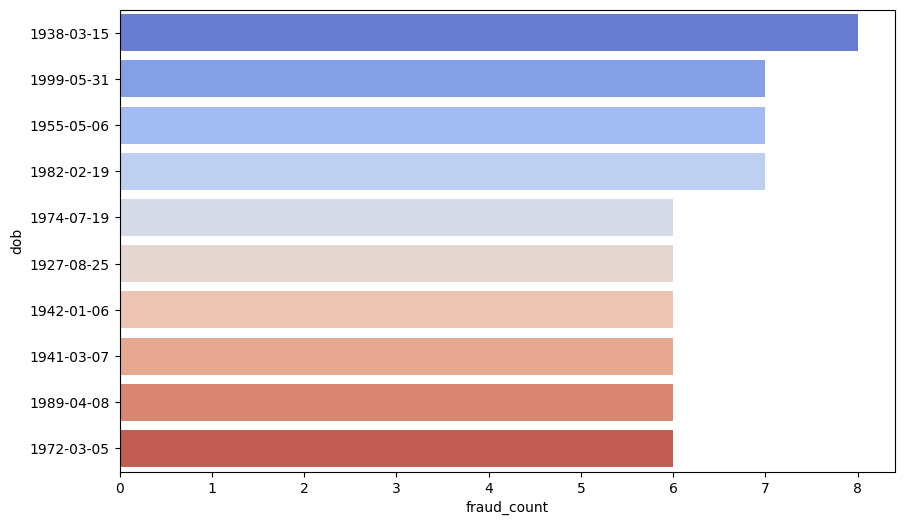

In [88]:
fraud_dob=df[df['is_fraud']==1].groupby('dob').size().reset_index(name='fraud_count')
sorted_fraud_dob=fraud_dob.sort_values(by='fraud_count',ascending=False)
plt.figure(figsize= (10, 6))
sns.barplot(data=sorted_fraud_dob.head(10),y='dob',x='fraud_count',palette='coolwarm')
plt.show()

In [89]:
df.drop(columns=['dob'],inplace=True)

In [90]:
#will require later to predict inputs
input_cols=df.columns.tolist()
input_cols.remove('is_fraud')

In [91]:
test_data=pd.read_csv('/content/fraudTest.csv')
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [92]:
df_test=test_data.sample(frac=0.2,random_state=42)
df_test=df_test[df.columns]
df_test.head()
df_train=df.copy()

In [93]:
from sklearn.impute import SimpleImputer
categorical_col = df_train.select_dtypes(include=[object]).columns
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_train[categorical_col])
# Transform the training and test data
df_train[categorical_col] = imputer.transform(df_train[categorical_col])
df_test[categorical_col] = imputer.transform(df_test[categorical_col])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259335 entries, 1045211 to 658150
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   category  259335 non-null  object 
 1   amt       259335 non-null  float64
 2   gender    259335 non-null  object 
 3   state     259335 non-null  object 
 4   is_fraud  259335 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 11.9+ MB


In [94]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_data[categorical_col])
encoded_cols=encoder.get_feature_names_out(categorical_col).tolist()

In [95]:
df_train[encoded_cols]=encoder.transform(df_train[categorical_col])
df_test[encoded_cols]=encoder.transform(df_test[categorical_col])
df_train.drop(columns=categorical_col,inplace=True)
df_test.drop(columns=categorical_col,inplace=True)

In [96]:
sc=MinMaxScaler().fit(train_data[['amt']])

In [97]:
df_train['amt']=sc.transform(df[['amt']])
df_test['amt']=sc.transform(df_test[['amt']])

In [98]:
x_train=df_train[encoded_cols+['amt']]
y_train=df_train['is_fraud']
x_test=df_test[encoded_cols+['amt']]
y_test=df_test['is_fraud']

In [99]:
rfc = RandomForestClassifier(criterion='gini',max_depth=None,min_samples_split=2,random_state=42,)

In [100]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_test_pred=rfc.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.9970668682070107

In [103]:
accuracy_score(y_train,rfc.predict(x_train))

0.9999614398365049

In [104]:
def is_fraud(input):
  dt=pd.DataFrame([input])
  dt=dt[input_cols].copy()
  dt[categorical_col]=imputer.transform(dt[categorical_col])
  dt[encoded_cols]=encoder.transform(dt[categorical_col])
  dt.drop(columns=categorical_col,inplace=True)
  dt['amt']=sc.transform(dt[['amt']])
  if rfc.predict(dt[encoded_cols+['amt']])[0]==1:
    print('fraud')
  else:
    print('not fraud')

In [105]:
input={'trans_date_trans_time':'2020-06-21 12:14:25',
       'merchant':'fraud_Heller, Gutmann and Zieme',
       'category':'grocery_pos',
       'amt':107.23,
       'first':'Stephanie',
       'last':'Gill',
       'gender':'M',
       'street':'Bourbon',
       'city':'Orient',
       'state':'WA',
       'job':None,
       'dob':None,
       'trans_num':'1f76529f8574734946361c461b024d99'}

In [106]:
is_fraud(input)

not fraud
